In [1]:
!pip install matplotlib seaborn



In [2]:
from pathlib import Path
input_dir = Path('../data/output')



In [3]:
filenames = list(input_dir.glob("**/*.png"))

len(filenames)

1666

In [4]:
import os
import random
from collections import defaultdict

categories = defaultdict(list)

for filename in filenames:
    categories[filename.parts[3]].append(filename)

In [30]:
random.choice(list(categories.keys()))

'ЗУ'

In [61]:
from PIL import Image
from PIL.ImageStat import Stat
import numpy as np

def get_stat(filepath):
    img = Image.open(filepath)
    img_stat = Stat(img)
    
    d = {
        'width': img.width,
        'height': img.height
    }
    d.update({
        stat: np.mean(getattr(img_stat, stat)) for stat 
        in ['count', 'sum', 'sum2', 'mean', 'median', 'rms', 'var', 'stddev']
    })
    
    return d

In [63]:
get_stat(filename)

{'width': 1647,
 'height': 2314,
 'count': 3811158.0,
 'sum': 948627184.0,
 'sum2': 240969350800.0,
 'mean': 248.90786055052035,
 'median': 255.0,
 'rms': 251.4504556377052,
 'var': 1272.2085965722777,
 'stddev': 35.66803325910019}

In [64]:
import pandas as pd
df = pd.DataFrame(columns=['cat_id', 'filename', 'page', 'file_size_mb', "width", "height", 'count', 'sum', 'sum2', 'mean', 'median', 'rms', 'var', 'stddev'])

for cat_id in categories.keys():
    df =df.append(list(map(lambda x: dict(cat_id=cat_id, 
                                          filename=x.parts[-2], 
                                          page=x.stem, 
                                          file_size_mb=x.stat().st_size/1024/1024, **get_stat(x)), 
                           categories[cat_id])))

# bti_df = pd.DataFrame(map(lambda x: (x.parts[-2], x.stem, x.stat().st_size/1024/1024), categories['БТИ']), columns=['filename', 'page', 'file_size_mb'])
# svid_df = pd.DataFrame(map(lambda x: (x.parts[-2], x.stem, x.stat().st_size/1024/1024), categories['Свид. АГР']), columns=['filename', 'page', 'file_size_mb'])
# zu_df = pd.DataFrame(map(lambda x: (x.parts[-2], x.stem, x.stat().st_size/1024/1024), categories['ЗУ']), columns=['filename', 'page', 'file_size_mb'])

In [67]:
df

cat_id                                           filename page  \
0                БТИ  25. Летниковская улица, дом 11_11, строение 12...    0   
1                БТИ  25. Летниковская улица, дом 11_11, строение 12...    1   
2                БТИ  25. Летниковская улица, дом 11_11, строение 12...    2   
3                БТИ  25. Летниковская улица, дом 11_11, строение 12...    3   
4                БТИ                                             39 изм    0   
..               ...                                                ...  ...   
130  Разр. на стр-во                                                  2    1   
131  Разр. на стр-во                                                 52    0   
132  Разр. на стр-во                                                 52    1   
133  Разр. на стр-во                                                 16    0   
134  Разр. на стр-во                                                 16    1   

     file_size_mb width height      count           sum          sum2  \
0        3.563095  1721   2338  4023698.0  8.416459e+08  1.794236e+11   
1        4.814999  3308   2338  7734104.0  1.660235e+09  3.623798e+11   
2        4.731706  3308   2338  7734104.0  1.666875e+09  3.647640e+11   
3        6.001258  3308   2338  7734104.0  1.664269e+09  3.641160e+11   
4        1.492153  3307   2338  7731766.0  1.946902e+09  4.941543e+11   
..            ...   ...    ...        ...           ...           ...   
130      4.609321  1648   2334  3846432.0  8.918284e+08  2.110870e+11   
131      1.586013  1651   2319  3828669.0  8.999591e+08  2.266294e+11   
132      0.078861  1654   2316  3830664.0  9.635296e+08  2.453591e+11   
133      1.632440  1644   2317  3809148.0  8.721838e+08  2.190058e+11   
134      0.163266  1647   2314  3811158.0  9.486272e+08  2.409694e+11   

           mean      median         rms          var     stddev  
0    209.172226  215.333333  211.165594   837.785856  28.941395  
1    214.664217  221.333333  216.459553   773.977687  27.815541  
2    215.522715  222.000000  217.170451   712.935332  26.696652  
3    215.185788  221.666667  216.977274   774.168588  27.818268  
4    251.805572  255.000000  252.808659   506.169068  22.496924  
..          ...         ...         ...          ...        ...  
130  231.858603  240.333333  234.217112  1084.394946  31.630424  
131  235.057962  255.000000  243.295553  3940.480585  62.773244  
132  251.530692  255.000000  253.083610   783.624398  27.993292  
133  228.970824  255.000000  239.780538  5067.068181  71.183340  
134  248.907861  255.000000  251.450456  1272.208597  35.668033  

[1666 rows x 14 columns]

In [68]:
df.to_csv('dataset.csv')

In [40]:
df.file_size_mb.describe()


count    1666.000000
mean        2.347595
std         1.583736
min         0.016268
25%         1.377743
50%         2.139768
75%         2.835631
max        15.044360
Name: file_size_mb, dtype: float64

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 6))
sns.boxplot(x=df.cat_id, y=df['mean'])
plt.title("Boxplot Pixel Intensity")
plt.savefig('fig.png')


In [94]:
df[df.cat_id == 'БТИ']['file_size_mb'].describe()


count    343.000000
mean       3.464479
std        1.976511
min        0.270130
25%        1.636415
50%        3.004326
75%        5.031889
max       11.144022
Name: file_size_mb, dtype: float64

In [95]:
df.cat_id.value_counts()



ЗУ                 747
БТИ                343
Разр. на ввод      280
Свид. АГР          161
Разр. на стр-во    135
Name: cat_id, dtype: int64

In [104]:
df[df.page.astype(int) == 34]


cat_id                             filename page  file_size_mb width  \
177     ЗУ  M_01_005599_05_06_1996 исправленное   34      2.343269  1653   

    height      count          sum          sum2        mean  median  \
177   2339  3866367.0  855868989.0  1.930702e+11  221.362584   229.0   

            rms         var     stddev  
177  223.463221  934.417846  30.568249

In [120]:
df['ratio'] = df.width/df.height

In [148]:
df['pixel_intensity'] = df['sum']/df['count']

In [149]:
df['pixel_intensity']

232.974678    1
214.689621    1
234.504896    1
239.700986    1
242.425043    1
             ..
238.327733    1
237.995508    1
207.748718    1
239.189710    1
245.722910    1
Name: pixel_intensity, Length: 1666, dtype: int64

In [151]:
# Boxplot of mean pixel intensity
ax = sns.boxplot(x=df.cat_id, y=df['pixel_intensity'])
plt.title("boxplot of mean pixel intensity")
plt.show()




/opt/anaconda3/envs/dassu/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


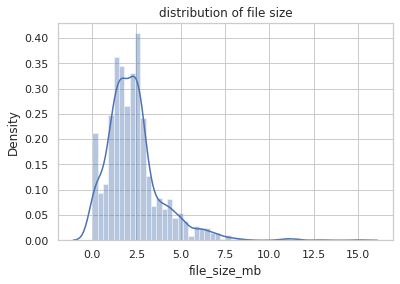

In [152]:
sns.distplot(df.file_size_mb)
plt.title("distribution of file size")
plt.show()




In [153]:
sns.distplot(df.pixel_intensity)




/opt/anaconda3/envs/dassu/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pixel_intensity', ylabel='Density'>

In [158]:
df['filepath'] = "{}/{}.png".format(df.filename, df.page)
df

cat_id                                           filename page  \
0                БТИ  25. Летниковская улица, дом 11_11, строение 12...    0   
1                БТИ  25. Летниковская улица, дом 11_11, строение 12...    1   
2                БТИ  25. Летниковская улица, дом 11_11, строение 12...    2   
3                БТИ  25. Летниковская улица, дом 11_11, строение 12...    3   
4                БТИ                                             39 изм    0   
..               ...                                                ...  ...   
130  Разр. на стр-во                                                  2    1   
131  Разр. на стр-во                                                 52    0   
132  Разр. на стр-во                                                 52    1   
133  Разр. на стр-во                                                 16    0   
134  Разр. на стр-во                                                 16    1   

     file_size_mb width height      count           sum          sum2  \
0        3.563095  1721   2338  4023698.0  8.416459e+08  1.794236e+11   
1        4.814999  3308   2338  7734104.0  1.660235e+09  3.623798e+11   
2        4.731706  3308   2338  7734104.0  1.666875e+09  3.647640e+11   
3        6.001258  3308   2338  7734104.0  1.664269e+09  3.641160e+11   
4        1.492153  3307   2338  7731766.0  1.946902e+09  4.941543e+11   
..            ...   ...    ...        ...           ...           ...   
130      4.609321  1648   2334  3846432.0  8.918284e+08  2.110870e+11   
131      1.586013  1651   2319  3828669.0  8.999591e+08  2.266294e+11   
132      0.078861  1654   2316  3830664.0  9.635296e+08  2.453591e+11   
133      1.632440  1644   2317  3809148.0  8.721838e+08  2.190058e+11   
134      0.163266  1647   2314  3811158.0  9.486272e+08  2.409694e+11   

           mean      median         rms          var     stddev     ratio  \
0    209.172226  215.333333  211.165594   837.785856  28.941395  0.736099   
1    214.664217  221.333333  216.459553   773.977687  27.815541   1.41488   
2    215.522715  222.000000  217.170451   712.935332  26.696652   1.41488   
3    215.185788  221.666667  216.977274   774.168588  27.818268   1.41488   
4    251.805572  255.000000  252.808659   506.169068  22.496924   1.41446   
..          ...         ...         ...          ...        ...       ...   
130  231.858603  240.333333  234.217112  1084.394946  31.630424  0.706084   
131  235.057962  255.000000  243.295553  3940.480585  62.773244  0.711945   
132  251.530692  255.000000  253.083610   783.624398  27.993292  0.714162   
133  228.970824  255.000000  239.780538  5067.068181  71.183340  0.709538   
134  248.907861  255.000000  251.450456  1272.208597  35.668033  0.711755   

     pixel_intensity                                           filepath  
0         209.172226  0      25. Летниковская улица, дом 11_11, стро...  
1         214.664217  0      25. Летниковская улица, дом 11_11, стро...  
2         215.522715  0      25. Летниковская улица, дом 11_11, стро...  
3         215.185788  0      25. Летниковская улица, дом 11_11, стро...  
4         251.805572  0      25. Летниковская улица, дом 11_11, стро...  
..               ...                                                ...  
130       231.858603  0      25. Летниковская улица, дом 11_11, стро...  
131       235.057962  0      25. Летниковская улица, дом 11_11, стро...  
132       251.530692  0      25. Летниковская улица, дом 11_11, стро...  
133       228.970824  0      25. Летниковская улица, дом 11_11, стро...  
134       248.907861  0      25. Летниковская улица, дом 11_11, стро...  

[1666 rows x 17 columns]

In [159]:
df.to_csv('dataset.csv')


